### 1.Business Understanding

#### Objective:
The goal is to predict whether ICU patients will develop sepsis (Sepssis) based on clinical and demographic attributes. This prediction will assist medical professionals in identifying high-risk patients early, allowing timely interventions to reduce mortality and improve patient outcomes.

#### Key Drivers:
Sepsis is a life-threatening condition requiring early detection. By leveraging patient data such as blood work results, blood pressure, BMI, age, and insurance status, we aim to create a model that predicts sepsis risk with high accuracy and recall.

#### Business Goals:

Risk Stratification: Prioritize patients based on their likelihood of developing sepsis.
Early Intervention: Enable proactive medical care for high-risk patients.
Resource Optimization: Allocate ICU resources efficiently by targeting high-risk cases.
Patient Outcomes: Improve survival rates and reduce ICU stay duration by preventing severe sepsis cases.
#### Impact:
This solution could enhance healthcare decision-making, reduce costs associated with complications, and ultimately save lives.

### 1.2 Business Questions:


1. What factors most influence the likelihood of a patient being diagnosed with sepsis?
2. Is there a correlation between age and sepsis diagnosis?
3. How does having insurance affect the likelihood of a sepsis diagnosis?
4. Are patients with higher BMI more prone to sepsis?
5. Does the number of pregnancies (PRG) have an impact on the sepsis outcome in women?

### 1.3 Hypothesis:

Null Hypothesis (H0):There is no significant association between the patient’s age and the likelihood of sepsis.

Alternative Hypothesis (H1): There is a significant association between the patient’s age and the likelihood of sepsis.

### 2. Data Understanding 

In [5]:
#Basic imports 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Statistics
from scipy import stats
from scipy.stats import shapiro, trim_mean, mstats, mode, ttest_ind

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

In [6]:
# loading training data
data_train = pd.read_csv('data/Paitients_Files_Train.csv')
#check data structure
data_train.head(10)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
5,ICU200015,5,116,74,0,0,25.6,0.201,30,1,Negative
6,ICU200016,3,78,50,32,88,31.0,0.248,26,0,Positive
7,ICU200017,10,115,0,0,0,35.3,0.134,29,1,Negative
8,ICU200018,2,197,70,45,543,30.5,0.158,53,1,Positive
9,ICU200019,8,125,96,0,0,0.0,0.232,54,1,Positive


In [7]:
#loading Test data
# Load The Test Dataset
data_test = pd.read_csv("data/Paitients_Files_Test.csv")
data_test.head(10)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0
5,ICU200614,4,183,0,0,0,28.4,0.212,36,1
6,ICU200615,1,124,60,32,0,35.8,0.514,21,1
7,ICU200616,1,181,78,42,293,40.0,1.258,22,1
8,ICU200617,1,92,62,25,41,19.5,0.482,25,0
9,ICU200618,0,152,82,39,272,41.5,0.270,27,0


In [8]:
# Checking column information 
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [9]:
#shape of the train data set
data_train.shape

(599, 11)

In [10]:
#shape of the test data

data_test.shape

(169, 10)

In [11]:
#summary statistics of train dataset
data_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,599,599,ICU200010,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRG,599.0,NaN,NaN,NaN,3.824708,3.362839,0.0,1.0,3.0,6.0,17.0
PL,599.0,NaN,NaN,NaN,120.153589,32.682364,0.0,99.0,116.0,140.0,198.0
PR,599.0,NaN,NaN,NaN,68.732888,19.335675,0.0,64.0,70.0,80.0,122.0
SK,599.0,NaN,NaN,NaN,20.562604,16.017622,0.0,0.0,23.0,32.0,99.0
TS,599.0,NaN,NaN,NaN,79.460768,116.576176,0.0,0.0,36.0,123.5,846.0
M11,599.0,NaN,NaN,NaN,31.920033,8.008227,0.0,27.1,32.0,36.55,67.1
BD2,599.0,NaN,NaN,NaN,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,NaN,NaN,NaN,33.290484,11.828446,21.0,24.0,29.0,40.0,81.0
Insurance,599.0,NaN,NaN,NaN,0.686144,0.464447,0.0,0.0,1.0,1.0,1.0


In [12]:
#check for missing values
data_train.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [13]:
#check for duplicate
data_train.duplicated().sum()

0

In [14]:
#check for target class distribution 
data_train['Sepssis'].value_counts()

Sepssis
Negative    391
Positive    208
Name: count, dtype: int64

In [15]:
#Rename columns 
data_train =data_train.rename(columns={
    "PRG": "Plasma_glucose",
    "PL": "Blood_Work_R1",
    "PR": "Blood_Pressure",
    "SK": "Blood_Work_R2",
    "TS": "Blood_Work_R3",
    "M11": "BMI",
    "BD2": "Blood_Work_R4",
    "Age": "Patient_age",
    "Sepssis": "Target"
})

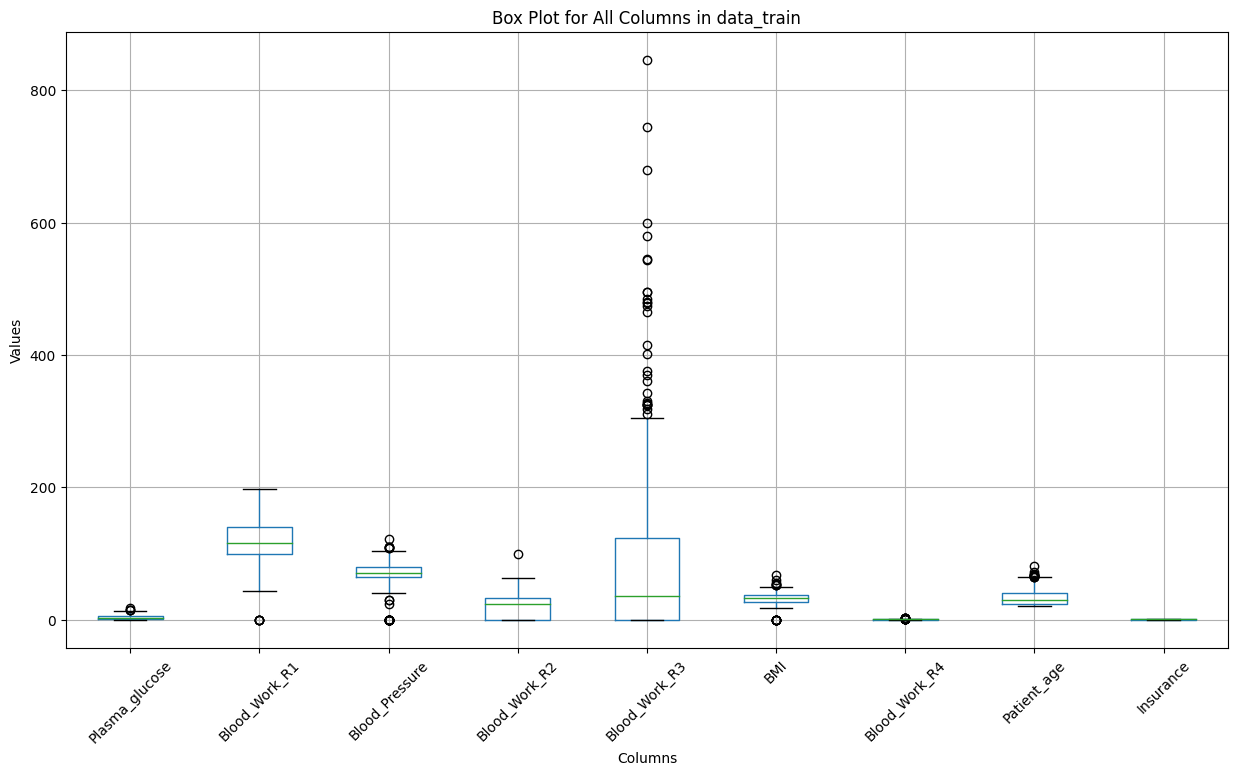

In [16]:
#check for outliers 
data_train.boxplot(figsize=(15, 8))
plt.title('Box Plot for All Columns in data_train')
plt.xlabel('Columns')
plt.ylabel('Values')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

plt.show()

The box plots of the various columns as visualized above, shows the presence of outliers in our data. Outliers can skew the results of machine learning models and make them less accurate and reliable.

### Issues With the Data
Too many zeros in each column

The column names are not very descriptive.

The target variable 'Sepssis' may have imbalanced classes.

There are many outliers in some of the numerical columns.

There could be correlations between some of the predictor variables, leading to multicollinearity

### How I Intend to Solve Them
Replace zeros in each column with the median value

Rename the column names to be more descriptive and easier to understand.

Handle the imbalanced classes in the target variable using techniques such as undersampling or oversampling.

Use visualization techniques such as box plots and scatter plots to identify outliers and then remove them.

Use correlation analysis to identify highly correlated variables and consider dropping or transforming them.

### Univariat Analysis

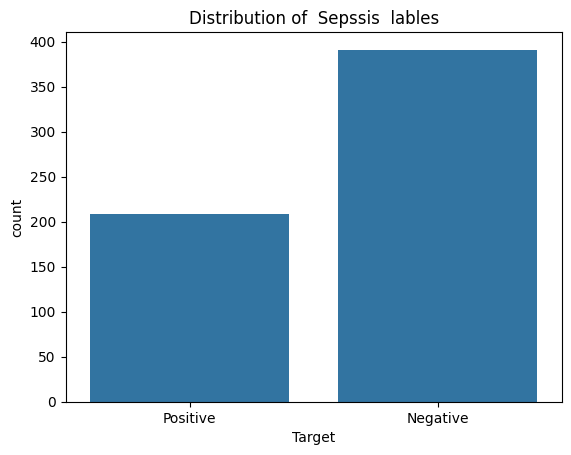

In [17]:
# Analyze variables individually

#Distribution of the target variable 
target_col ="Target"
sns.countplot(x=target_col,data=data_train)
plt.title('Distribution of  Sepssis  lables')
plt.show()

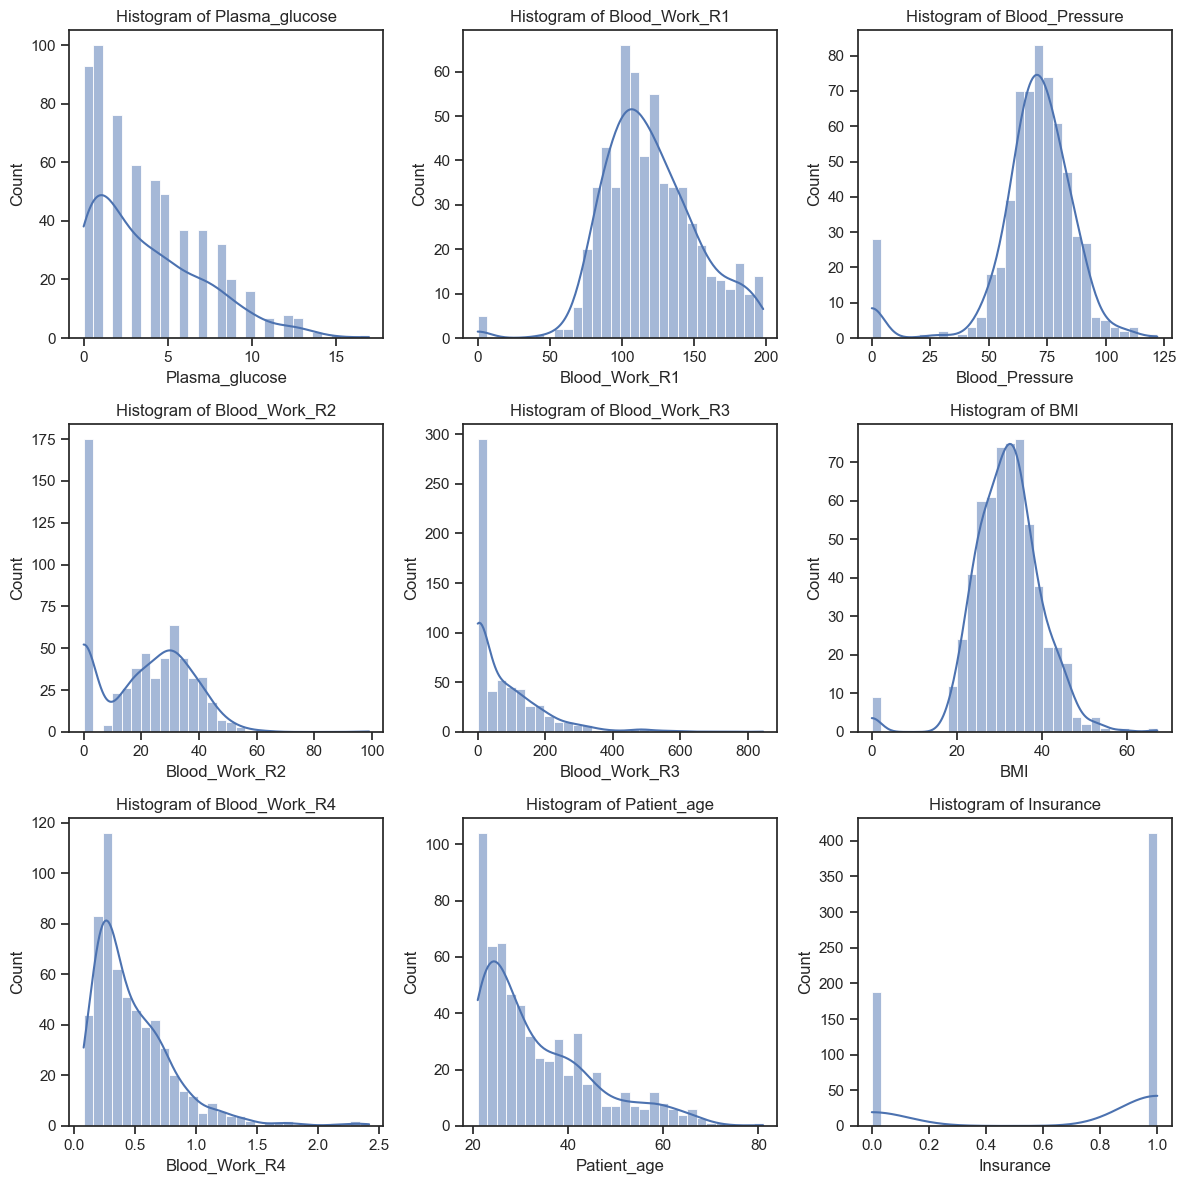

In [18]:
# Visualize numerical variables 
# Set the style for the plot
sns.set(style="ticks", color_codes=True)
numerical_columns =data_train.select_dtypes(include=['Float64','int64'])

#Create a grid 3x3 subplot
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
#flatten the axes array
axes =axes.flatten()

for i,col in enumerate(numerical_columns):
    sns.histplot(data=data_train,x=col, kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')


# Turn off extra axes
for j in range(len(numerical_columns), len(axes)):
    axes[j].set_visible(False)
    
# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


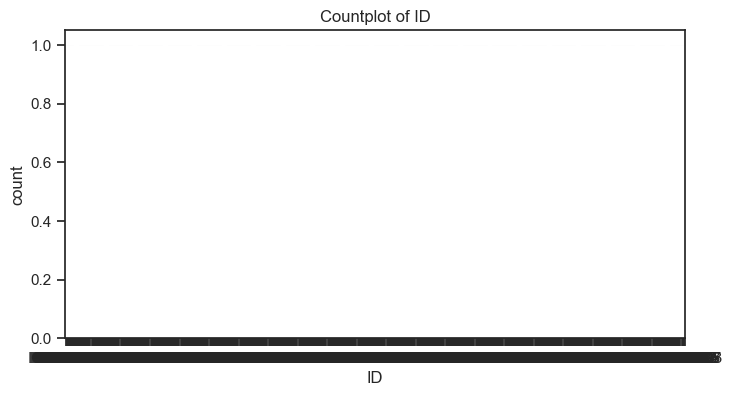

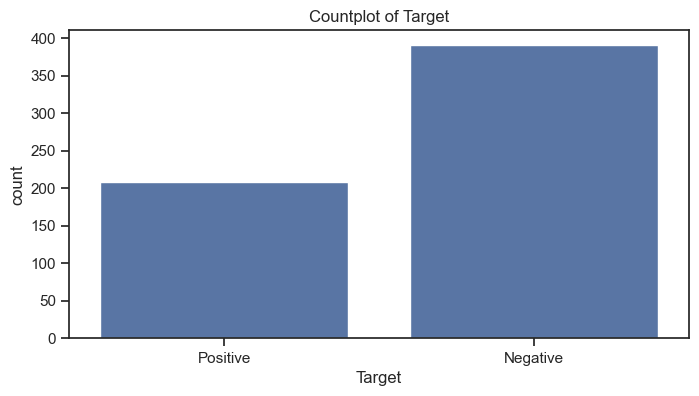

In [19]:
# Visualize categorical variables

categorical_column =data_train.select_dtypes(include=['object','category']).columns

for col in categorical_column:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col,data=data_train)
    plt.title(f'Countplot of {col}')
    plt.show()

    

### Bivariate Analysis

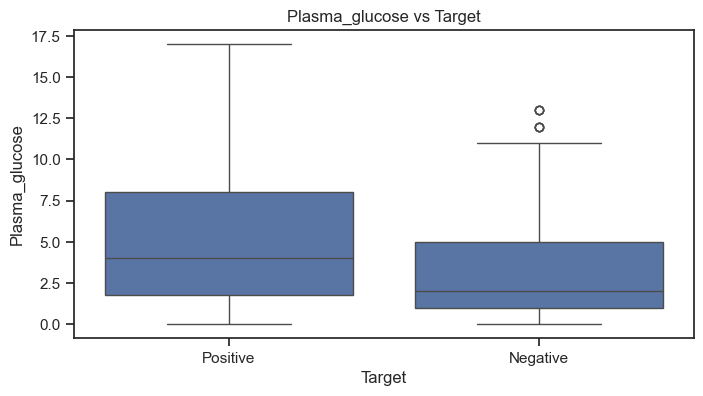

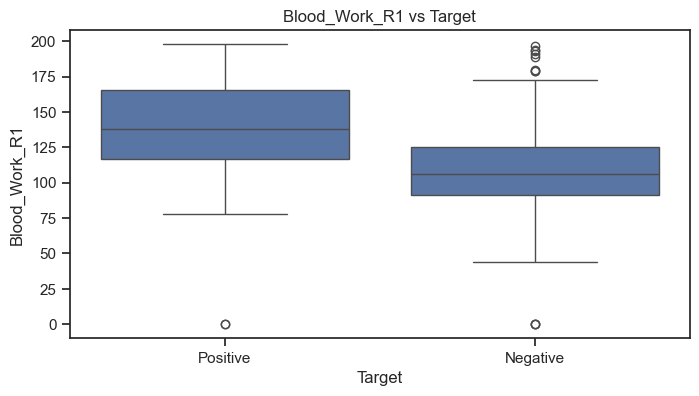

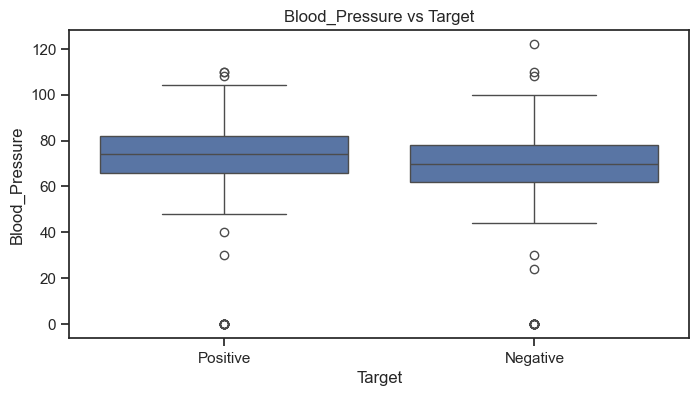

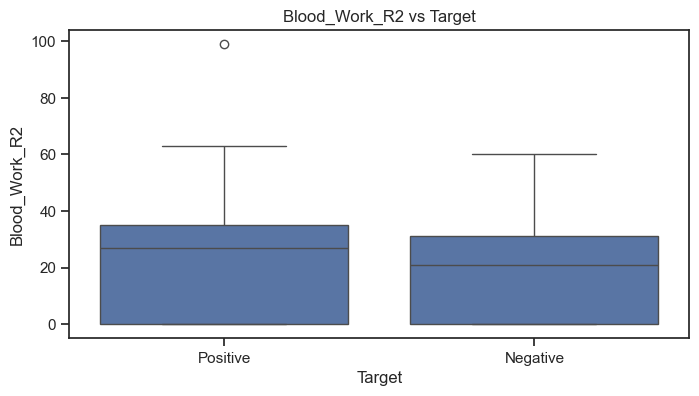

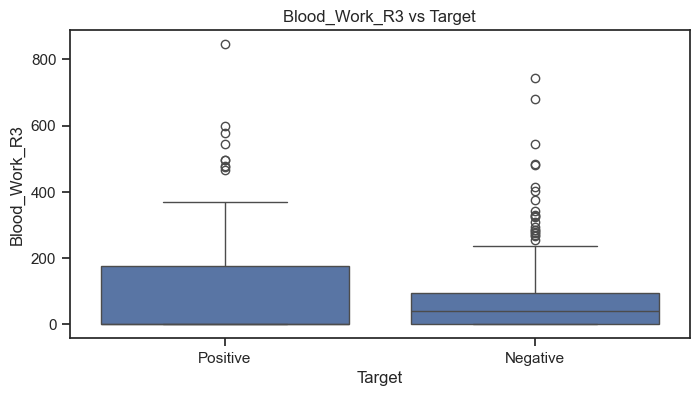

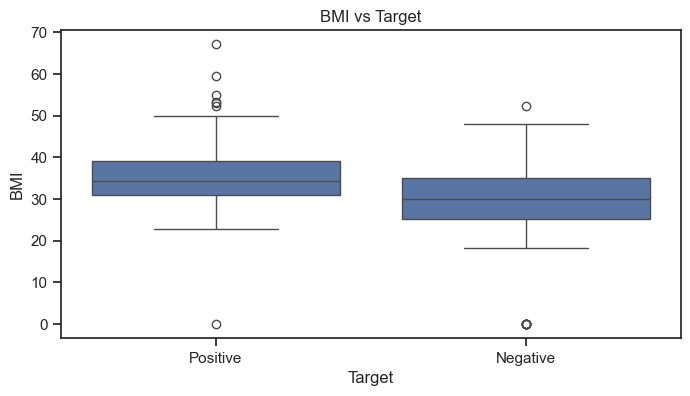

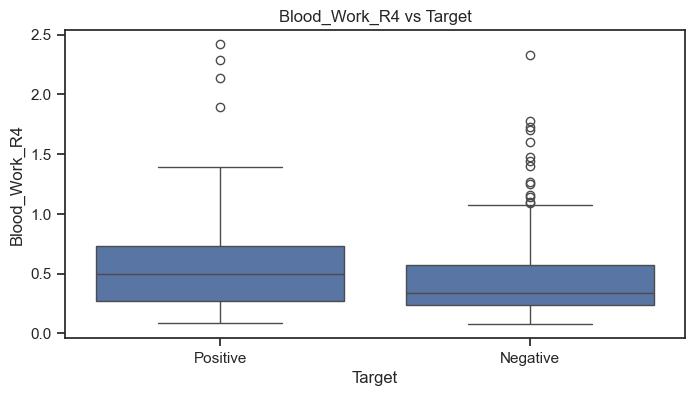

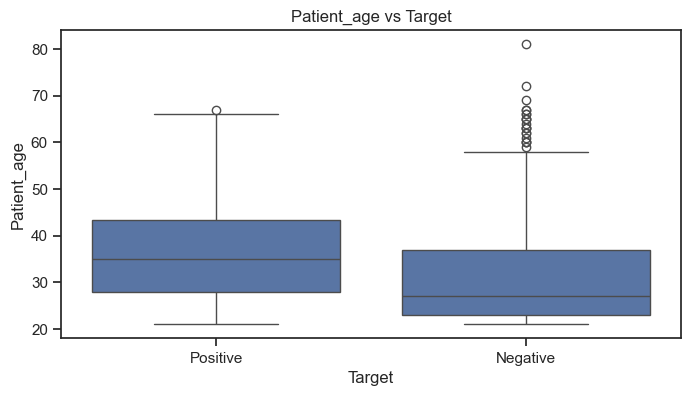

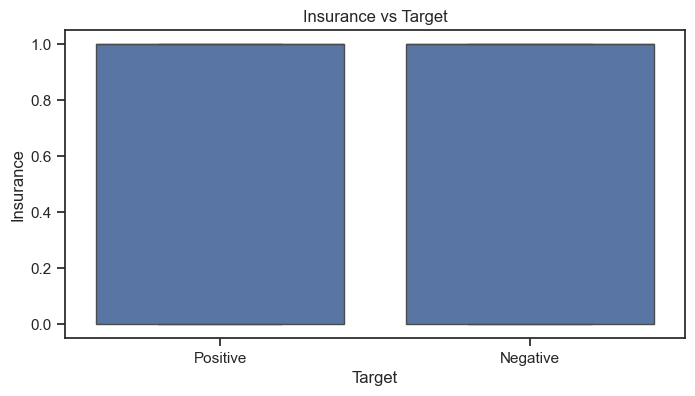

In [20]:
# Understand the relashionships between features and the target variables
# correlationship heatmap

for col in numerical_columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=target_col, y=col, data=data_train)
    plt.title(f'{col} vs {target_col}')
    plt.show()

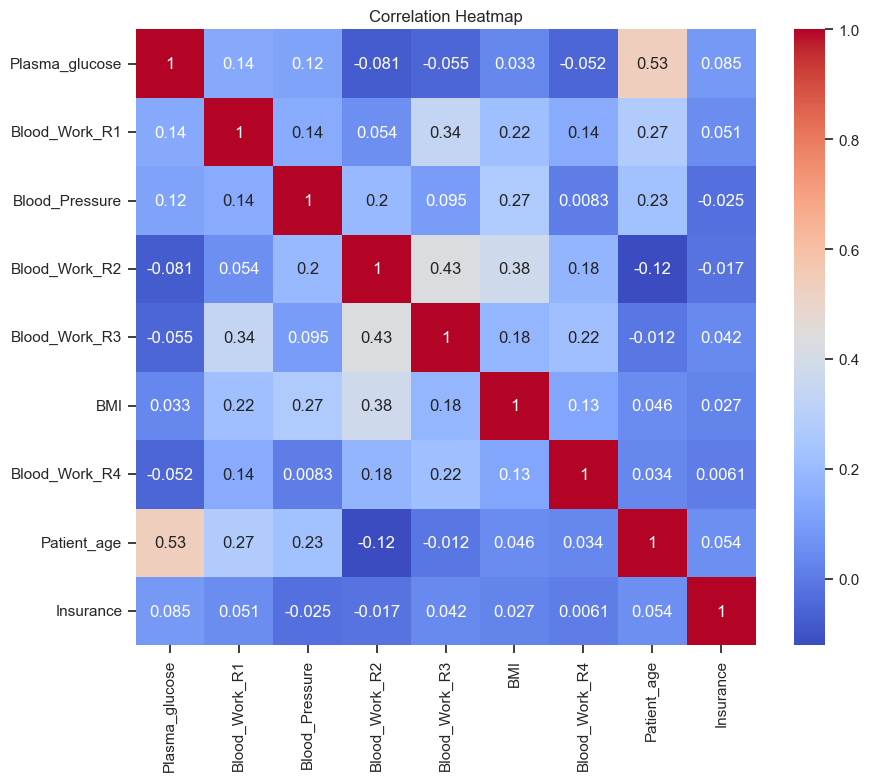

In [21]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Hypothesis Validation

#### What is P-value and t-statistic?
The p-value is like a "strength meter" for our data. It tells us how strong the evidence is against a particular idea. A small p-value means the evidence is strong and suggests that our idea is likely true, while a large p-value means the evidence is weak and our idea may not be true.

The t-statistic is like a "difference detector" between two groups. It measures how different the average values are between two groups and compares it to the variation within each group. A larger t-statistic means there is a bigger difference between the groups being compared.

In simpler terms, the p-value helps us decide if our idea is likely true or not, and the t-statistic tells us how big the difference is between two groups.

##### perform an independent samples t-test to compare the ages of patients with positive and negative Sepssis.

In [22]:
data_train.head(3)

,ID,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R2,Blood_Work_R3,BMI,Blood_Work_R4,Patient_age,Insurance,Target
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive


In [23]:
#  slpit data into two groups based on Sepsis variable


sepsis_group = data_train[data_train['Target'] == 'Positive']['Patient_age']
no_sepsis_group = data_train[data_train['Target'] == 'Negative']['Patient_age']

# Perform independent samples t-test
t_stat,p_value =ttest_ind(sepsis_group,no_sepsis_group)

#Print Results

print('T-Statistics', t_stat)
print('P Value', p_value)

T-Statistics 5.254202967191448
P Value 2.0718778891881853e-07


In [24]:
alpha = 0.05 #significant 

if p_value <alpha:
    print('Reject the null hypothesis: significant difference in age')
else:
    print('Fail to reject the null hypothesis: No significance difference in age')

Reject the null hypothesis: significant difference in age


### Interpreting the results:
A very small p-value of 2.0718778891881853e-07, we can conclude that there is a significant difference in the mean age between patients with and without Sepsis.

A large t-statistic of 5.254202967191448 means there is a bigger difference between the groups being compared.

Null Hypothesis: Age does not determine whether a patient will develop Sepsis.

#### Null Hypothesis Rejected!

### Data Preparation 

In [25]:
''' Preparing the data by cleaning, transforming
and spliting it into training and validating stes'''

# Feature Engineering 
data_train = data_train.drop(columns =['ID'])

X =data_train.drop(columns =['Target'])
y = data_train['Target']

In [26]:


#Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)



#Encode target variable 
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.fit_transform(y_val)

# print the shape 
print(f'Training dataset Shape: {X_train.shape}')
print(f'Validing dataset shape:{X_val.shape}')
print(f'Y Training set shape:{y_train_encoded.shape}')
print(f'Y validatings set shape:{y_val_encoded.shape}')



# Creating Pipeline and systematic transformation 

# pipeline = Pipeline([
#     ('imputer',SimpleImputer(strategy='median')), #Handle missing values
#     ('outlier_handler',RobustScaler()), #Handles outliers( make scaling less sensitive to extreme values)
#     ('scaler',QuantileTransformer(output_distribution='normal')) #Normalize the distribution of numerical features
# ])


Training dataset Shape: (419, 9)
Validing dataset shape:(180, 9)
Y Training set shape:(419,)
Y validatings set shape:(180,)


In [27]:
#number of input features
input_features = X.columns

print(input_features)

Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Patient_age', 'Insurance'],
      dtype='object')


In [28]:
# Features preprocessing 

preprocessor = ColumnTransformer(transformers=[
   ('imputer',SimpleImputer(strategy='median'),input_features), #Handle missing values
     ('outlier_handler',RobustScaler(), input_features), #Handles outliers( make scaling less sensitive to extreme values)
     ('scaler',QuantileTransformer(output_distribution='normal', n_quantiles=330), input_features) #Normalize the distribution of numerical features
 ])


In [29]:
#check for multicollinearity using variance inflation factor (VIF)

vif_data = pd.DataFrame()
vif_data['Feature'] =X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

print('Variance inflation Factor', vif_data)

Variance inflation Factor           Feature        VIF
0  Plasma_glucose   3.226812
1   Blood_Work_R1  16.216312
2  Blood_Pressure  14.072380
3   Blood_Work_R2   3.933874
4   Blood_Work_R3   2.035340
5             BMI  18.011167
6   Blood_Work_R4   3.224233
7     Patient_age  13.294282
8       Insurance   3.072380


#### Observation 
we can see that most of our features are more correlated and this will affect our model

#### Solution 
We have two option, either to them out or apply dimenssionallity reduction.
we are going to use the later.

In [30]:
numeric_data = data_train.select_dtypes(include =['float64','int64'])
scaler =StandardScaler()
scaled_data =scaler.fit_transform(numeric_data)

#Initialize PCA with the number of columns to keep
pca= PCA(n_components=9)

# Fit the scaled data into the pca and transform it 
principal_components =pca.fit_transform(scaled_data)

#create a data frame for all the components

pca_df = pd.DataFrame(data=principal_components, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])

explain_variance= pca.explained_variance_

print(f'Explained variance ration: {explain_variance}')

cumulative_variance =explain_variance.cumsum()
print(f'Cumulative variance: {cumulative_variance}')




Explained variance ration: [2.08545334 1.71886465 1.09497311 0.97850944 0.84058674 0.76060621
 0.70297572 0.42294981 0.41013115]
Cumulative variance: [2.08545334 3.804318   4.89929111 5.87780055 6.71838729 7.47899349
 8.18196921 8.60491902 9.01505017]


We are choosing a PCA of 6 since it gives around 80% 

### Modelling 

In [31]:
#Train a classification model and tune it 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
models={
    'Logistic Regression':LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

results_table = pd.DataFrame(columns=['name', 'accuracy', 'precision', 'recall', 'f1_Score'])

all_pipelines ={}

for name, model in models.items():
    # for the imbalanced class
    pipeline = Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('pca',PCA(n_components=7)), #Reduce dimensions
        ('model', model) #Add the classifier
    ])
    pipeline.fit(X_train,y_train_encoded)
    y_pred = pipeline.predict(X_val)
    metrics = classification_report(y_val_encoded,y_pred, output_dict=True)

    all_pipelines[name]=pipeline
    #picking values from metics dict
    accuracy = metrics ['accuracy']
    precision = metrics['weighted avg']['precision']
    recall =metrics['weighted avg']['recall']
    f1 = metrics['weighted avg']['f1-score']

    #add the value to the results_table

    results_table.loc[len(results_table)] = [name,accuracy, precision, recall,f1]

#sort the table with f1 score
results_table = results_table.sort_values('f1_Score', ascending=False)
print(f'Results')
print(results_table)

Results
                  name  accuracy  precision    recall  f1_Score
0  Logistic Regression  0.777778   0.773382  0.777778  0.773918
2        Random Forest  0.761111   0.755114  0.761111  0.752165
1  K-Nearest Neighbors  0.727778   0.720767  0.727778  0.722349


In [32]:
from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.over_sampling import SMOTE
balanced_results_table =pd.DataFrame(columns=['name', 'accuracy', 'precision', 'recall', 'f1_Score'])

balanced_pipelines ={}

#iterate through the dictionary items 
for name, model in models.items():
    pipeline = imbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote_sampler',SMOTE(random_state =42)),
        ('pca', PCA(n_components=7)),
        ('model', model)
        
    ])

    pipeline.fit(X_train,y_train_encoded)
    y_pred = pipeline.predict(X_val)
    balanced_metrics = classification_report(y_val_encoded, y_pred, output_dict=True)

    balanced_metrics[name] = pipeline
    
    #picking values from metics dict
    accuracy = metrics ['accuracy']
    precision = metrics['weighted avg']['precision']
    recall =metrics['weighted avg']['recall']
    f1 = metrics['weighted avg']['f1-score']
    #add the value to the results_table

    balanced_results_table.loc[len(balanced_results_table)] = [name,accuracy, precision, recall,f1]

#sort the table with f1 score
balanced_results_table = balanced_results_table.sort_values('f1_Score', ascending=False)
print(f'Results')
print(balanced_results_table)



Results
                  name  accuracy  precision    recall  f1_Score
0  Logistic Regression  0.761111   0.755114  0.761111  0.752165
1  K-Nearest Neighbors  0.761111   0.755114  0.761111  0.752165
2        Random Forest  0.761111   0.755114  0.761111  0.752165


In [33]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
#Hyperparameter tuning Gridsearch

param_grid ={
    'Logistic Regression':{
        'model__C': [0.1, 1, 10],
        'model__solver': ['lbfgs', 'liblinear'],
        'model__max_iter': [100, 200, 500]
    },
    'K-Nearest Neighbors': {  # Correctly spelled
        'model__n_neighbors': [3, 5, 7],
        'model__weights': ['uniform', 'distance']
    },
    'Random Forest':{
        'model__n_estimators':[50,100,200],
        'model__max_depth':[None, 10, 20]
    },
    'LightGBM':{
        'model__num_leaves':[31,50,100],
        'model__learning_rate':[0.01, 0.1,0.2]

    }
}

#Create a StratifiedKfold object

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

tuned_models_df = pd.DataFrame(columns=['name', 'accuracy', 'precision', 'recall', 'f1_Score'])

all_pipelines ={} # To store tuned pipelines

for name, model in models.items():
    print(f'Tuning Hyperparamters for: {name}')

    #create the pipeline
    pipeline =imbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    
    ])

    #U Gridsearch cv

    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid[name],
        cv=skf,
        scoring=['f1_weighted', 'f1', 'accuracy', 'precision', 'recall'],
        refit='f1_weighted',
        n_jobs=-1
    )

    grid_search.fit(X_train,y_train_encoded)

    #update the parameters to the pipeline
    best_pipeline = grid_search.best_estimator_
    all_pipelines[name] = best_pipeline

    #predict with the tunned model(# use the validation set)
    y_pred = best_pipeline.predict(X_val)

    # store the results
    tuned_metrics = classification_report(y_val_encoded, y_pred, output_dict=True)

    
    #picking values from metics dict
    accuracy = metrics ['accuracy']
    precision = metrics['weighted avg']['precision']
    recall =metrics['weighted avg']['recall']
    f1 = metrics['weighted avg']['f1-score']

    
    tuned_models_df.loc[len(results_table)] = [name,accuracy, precision, recall,f1]
    #sort the table with f1 score
 
tuned_models_df =  tuned_models_df.sort_values('f1_Score', ascending=False).reset_index(drop=True)
print(f' Tune Results')
print(tuned_models_df)
    

Tuning Hyperparamters for: Logistic Regression


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Tuning Hyperparamters for: K-Nearest Neighbors
Tuning Hyperparamters for: Random Forest
 Tune Results
            name  accuracy  precision    recall  f1_Score
0  Random Forest  0.761111   0.755114  0.761111  0.752165


In [36]:
test_set =pd.read_csv('data/Paitients_Files_Test.csv')

test_set = test_set.drop('ID', axis=1)

# Rename columns 
test_set =test_set.rename(columns={
    "PRG": "Plasma_glucose",
    "PL": "Blood_Work_R1",
    "PR": "Blood_Pressure",
    "SK": "Blood_Work_R2",
    "TS": "Blood_Work_R3",
    "M11": "BMI",
    "BD2": "Blood_Work_R4",
    "Age": "Patient_age"
   
})


In [38]:

#Initialize prediction dictionary

test_predictions ={}

for name, pipeline in all_pipelines.items():
    print((f'Generating predictions for Test set: {name}'))
    y_test_pred = pipeline.predict(test_set)
    y_test_prob = pipeline.predict_proba(test_set)[:,1] #predicted probabilities for ROC AUC

    #Store Predictions
    test_predictions[name] ={
        'predictions': y_test_pred,
        'probabilities': y_test_prob
    }

# Display predictions for each model
for name, preds in test_predictions.items():
    print(f'Predictions for {name}:')
    print(preds['predictions'])
    #print(f'Probabilities for {name} (if applicable):')
    #print(preds['probabilities'])

Generating predictions for Test set: Logistic Regression
Generating predictions for Test set: K-Nearest Neighbors
Generating predictions for Test set: Random Forest
Predictions for Logistic Regression:
[0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0
 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1
 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0]
Predictions for K-Nearest Neighbors:
[0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0
 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0
 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1
 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0]
Predictions for Random Forest:
[0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0

In [40]:
#Persist the model 
import joblib
for name, pipeline in all_pipelines.items():
    joblib.dump(pipeline,f'model/{name}_pipeline.pkl')


# lable enconder
joblib.dump(label_encoder, 'lable_encoder.pkl')

#save test data

test_set.to_csv('data/test.csv', index=False)
